In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


(train_X, train_y), (test_X, test_y) = mnist.load_data() #load dataset
train_X, test_X = train_X[..., np.newaxis]/255.0, test_X[..., np.newaxis]/255.0 

num_train = train_X.shape[0]
num_test = test_X.shape[0]

train_X_flatten = train_X.reshape(num_train, 784) #flatten train images (60000, 784)
test_X_flatten = test_X.reshape(num_test, 784) #flatten test images (10000, 784)

train_y_check = np.eye(10)[train_y.reshape(-1)]
test_y_check = np.eye(10)[test_y.reshape(-1)]

#show train & test dimensions
print('Training set: ' + str(num_train) + ' images')
print('Test set:  '  + str(num_test)+ ' images')



Training set: 60000 images
Test set:  10000 images


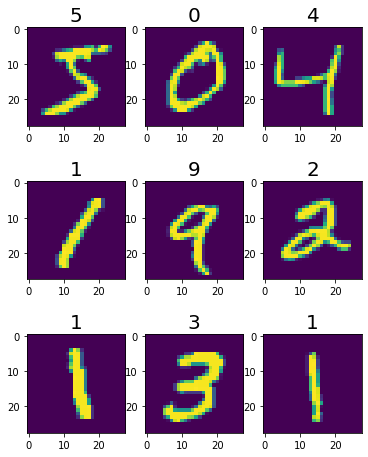

In [2]:
#plot first numbers of training set

plt.subplots(figsize=(6,8))
for i in range(9): 
    plt.subplot(330 + 1 + i)
    plt.title(train_y[i], fontsize=20)
    plt.imshow(train_X[i])
    
plt.show()


In [62]:
batch_size = 500

X_batch = np.array_split(train_X_flatten, np.ceil(len(train_X_flatten)/batch_size))
y_batch = np.array_split(train_y_check, np.ceil(len(train_y_check)/batch_size))

print(str(len(X_batch))+' batches created for X')
print(str(len(y_batch))+' batches created for y')



120 batches created for X
120 batches created for y


In [73]:
def sigmoid(z, derivative=False):
    if derivative:
        z = sigmoid(z)
        return z * (1 - z)
    z = np.clip(z, -500, 500)  # avoid overflow
    return 1 / (1 + np.exp(-z))


input_layer = 784
hidden_layer = 100
output_layer = 10

learning_rate = 0.1

Wh = np.random.randn(input_layer, hidden_layer) * np.sqrt(2.0/input_layer) #input weights (1,2)
Wo = np.random.randn(hidden_layer, output_layer) * np.sqrt(2.0/hidden_layer) #output weights (2,1)

Bh = np.full((1, hidden_layer), 0.1) #hidden bias (1,2)
Bo = np.full((1, output_layer), 0.1) #houtput bias (1,1)

count = X.shape[0]


def forward_prop(x):
    H = sigmoid(np.dot(x,Wh) + Bh)
    z2 = sigmoid(np.dot(H, Wo) + Bo)
    return H,z2


for k in range(800):

    for j in range (len(X_batch)):

        X = X_batch[j]
        Y = y_batch[j]

             
        H,z2=forward_prop(X)
            
        #backpropagation
        slope = z2 - Y
        d_ol = sigmoid(np.dot(H, Wo) + Bo, derivative=True)
        da = slope * d_ol
            
        #output layer weights + bias
        d_Wo = np.dot(H.T,da) / count
        d_Bo = np.sum(da,axis=0,keepdims=True) / count 
            
        #hidden layer weights + bias
        dah = np.dot(Wo,da.T)
        dzh = dah.T * sigmoid(np.dot(X,Wh) + Bh,derivative=True)
        d_Wh = np.dot(X.T,dzh) / count
        d_Bh = np.sum(dzh,axis=0,keepdims=True) / count
            
        Wo -= d_Wo * learning_rate
        Bo -= d_Bo * learning_rate
        Wh -= d_Wh * learning_rate
        Bh -= d_Bh * learning_rate
    

#test this shit 
correct = []
wrong = []

for i in range(len(test_y)):
    H,z2=forward_prop(test_X_flatten[i])
    predicted = np.argmax(z2)
    actual = test_y[i]
    if predicted == actual:
        correct.append(i)
    else:
        wrong.append(i)
score = len(correct)/num_test*100
print(score)

95.76


predicted:
6
actual value:
6


[[3.84830290e-05 2.28173335e-04 5.92995954e-03 9.76489219e-06
  2.28383496e-03 2.38395079e-03 9.96521489e-01 6.19374400e-06
  9.03833333e-04 2.05105860e-03]]


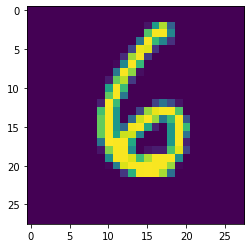

In [61]:
test =  91

H,z2=forward_prop(test_X_flatten[test])

print("predicted:")
print(np.argmax(z2))

plt.imshow(test_X[test])

print("actual value:")
print(test_y[test])

print("\n\n"+str(z2))